In [1]:
import os 
import sys
sys.path.append('..')

In [2]:
import scripts.ts_forecast as ts

In [3]:
# Load data
df = ts.load_tesla_cleaned_data('../data/cleaned/TSLA_cleaned.csv')

In [4]:
# Split data
train, test = ts.train_test_split(df)

In [5]:
# Fit models
arima_model = ts.fit_arima(train['Adj Close'])
lstm_model, scaler, look_back = ts.fit_lstm(train['Adj Close'], epochs=50)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0151 - val_loss: 0.0020
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0011 - val_loss: 9.6758e-04
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.5287e-04 - val_loss: 0.0013
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 9.8368e-04 - val_loss: 9.0788e-04
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/

In [6]:
# Forecast
arima_forecast, _ = ts.forecast_arima(arima_model, len(test), test.index)
lstm_forecast = ts.forecast_lstm(lstm_model, scaler, train['Adj Close'], look_back, len(test), test.index)

In [7]:
#  Hyperparameter tuning
tuning_results = ts.tune_lstm_hyperparameters(train['Adj Close'], test['Adj Close'])
print(tuning_results)

Training LSTM with look_back=30, epochs=20, units=32
Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0201 - val_loss: 0.0025
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - val_loss: 9.9757e-04
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - val_loss: 9.2843e-04
Ep

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0113 - val_loss: 0.0014
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.9972e-04 - val_loss: 0.0010
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.7601e-04 - val_loss: 9.1248e-04
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.5290e-04 - val_loss: 0.0010
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.7458e-04 - val_loss: 8.0284e-04
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.2138e-04 - val_loss: 0.0016
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━

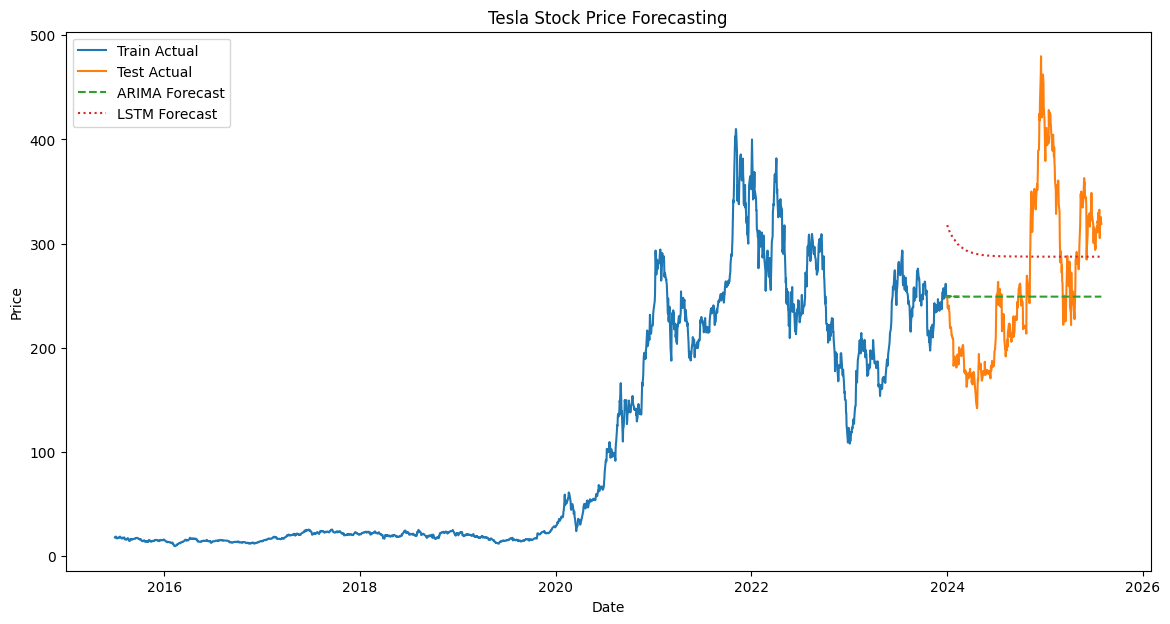


Discussion:
- ARIMA performed better in terms of RMSE. This indicates that the classical statistical model captured the linear and autoregressive structure of Tesla stock prices reasonably well.
- ARIMA models are generally more interpretable and faster to train, while LSTMs require more tuning and computational resources.
- The choice between ARIMA and LSTM depends on the trade-off between interpretability, computational complexity, and forecasting accuracy.
- Further tuning and additional data features might improve LSTM performance.


In [8]:
# Choose best LSTM params based on lowest RMSE
best_params = tuning_results.loc[tuning_results['RMSE'].idxmin()]
lstm_params = {
   'look_back': int(best_params['look_back']),
     'epochs': int(best_params['epochs']),
    'units': int(best_params['units'])
}

# Compare models
ts.compare_models(train, test, arima_model, lstm_params)

In [9]:
# Evaluate
ts.evaluate_forecasts(test['Adj Close'], arima_forecast)
ts.evaluate_forecasts(test['Adj Close'], lstm_forecast)

(74.52911183803896, 95.15685385725985, 25.933356323921362)

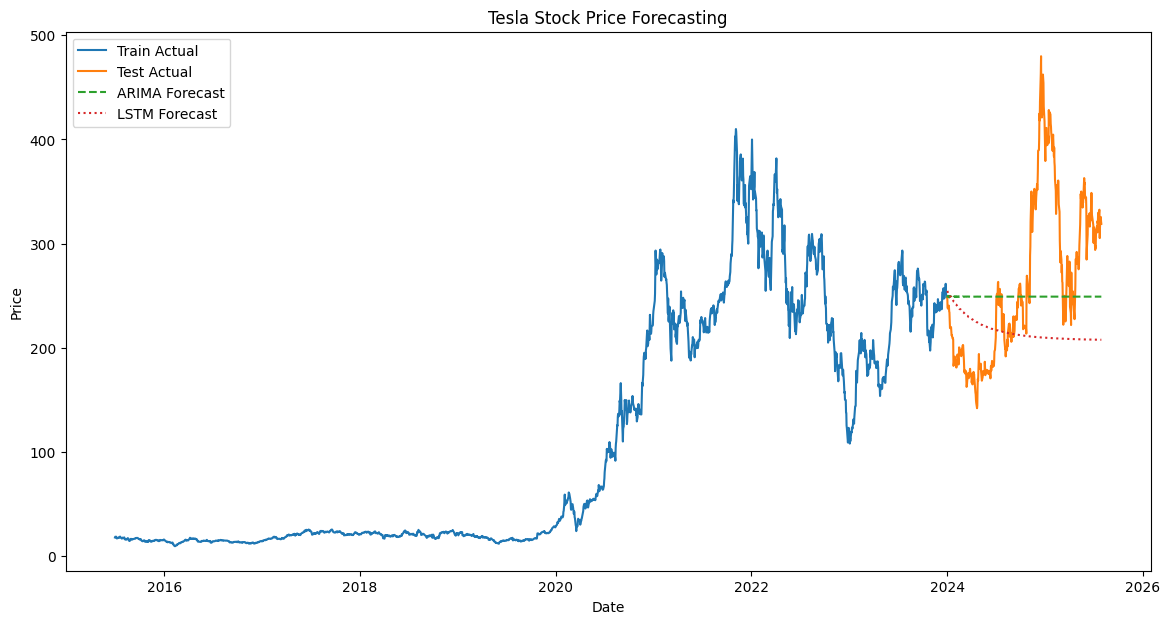

In [10]:
# Plot results
ts.plot_forecasts(train, test, arima_forecast, lstm_forecast)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay


def generate_future_dates(start_date, n_periods):
    return pd.date_range(start=start_date + BDay(1), periods=n_periods, freq='B')

forecast_horizon = 252  # 12 months approx trading days
last_date = df.index[-1]
future_dates = generate_future_dates(last_date, forecast_horizon)


In [20]:
arima_forecast, arima_conf_int = ts.forecast_arima(arima_model, n_periods=forecast_horizon, index=future_dates)
lstm_forecast = ts.forecast_lstm(lstm_model, scaler, df['Adj Close'], look_back, n_periods=forecast_horizon, index=future_dates)


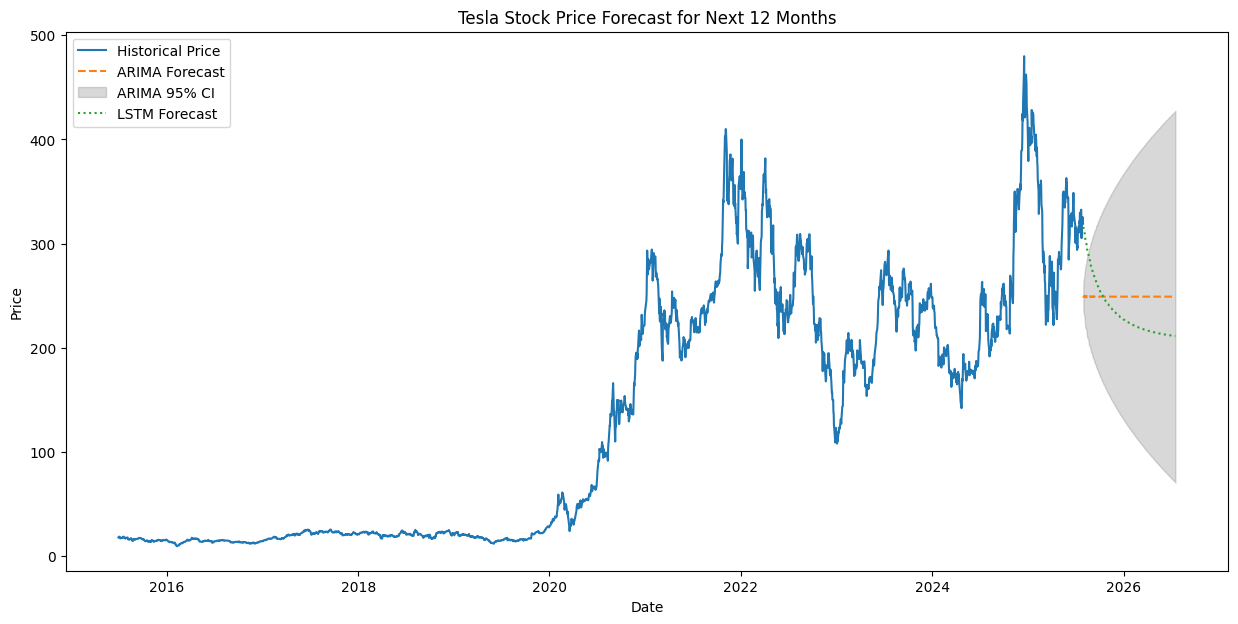

In [21]:
def plot_future_forecast(df, arima_forecast, arima_conf_int, lstm_forecast):
    plt.figure(figsize=(15, 7))
    plt.plot(df.index, df['Adj Close'], label='Historical Price')
    plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
    plt.fill_between(arima_conf_int.index, arima_conf_int['lower'], arima_conf_int['upper'], color='gray', alpha=0.3, label='ARIMA 95% CI')
    plt.plot(lstm_forecast.index, lstm_forecast, label='LSTM Forecast', linestyle=':')
    plt.title('Tesla Stock Price Forecast for Next 12 Months')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_future_forecast(df, arima_forecast, arima_conf_int, lstm_forecast)


In [22]:
def interpret_forecast(arima_forecast, arima_conf_int, lstm_forecast):
    print("----- Forecast Interpretation & Market Insights -----\n")

    # Trend Analysis
    arima_trend = "upward" if arima_forecast.iloc[-1] > arima_forecast.iloc[0] else "downward"
    lstm_trend = "upward" if lstm_forecast.iloc[-1] > lstm_forecast.iloc[0] else "downward"

    print(f"Trend Analysis:")
    print(f"- ARIMA model predicts a generally {arima_trend} trend over the next 12 months.")
    print(f"- LSTM model predicts a generally {lstm_trend} trend over the same period.\n")

    # Volatility and Confidence
    ci_width_start = arima_conf_int.iloc[0]['upper'] - arima_conf_int.iloc[0]['lower']
    ci_width_end = arima_conf_int.iloc[-1]['upper'] - arima_conf_int.iloc[-1]['lower']
    width_change_pct = ((ci_width_end - ci_width_start) / ci_width_start) * 100

    print(f"Volatility and Confidence Intervals:")
    print(f"- ARIMA 95% confidence interval width increases from {ci_width_start:.2f} to {ci_width_end:.2f}, a change of {width_change_pct:.1f}%.")
    print(f"- This widening indicates increasing uncertainty for longer-term predictions.\n")

    # Market Opportunities and Risks
    print(f"Market Opportunities and Risks:")
    if arima_trend == "upward" and lstm_trend == "upward":
        print("- Both models suggest favorable conditions for potential growth and buying opportunities in Tesla stock.")
    elif arima_trend == "downward" and lstm_trend == "downward":
        print("- Both models indicate possible decline risks; investors should be cautious.")
    else:
        print("- Mixed signals from models suggest volatility and uncertainty; diversification and caution are advised.")

    print("- Increasing confidence interval widths and forecast volatility highlight risks of unexpected market events or changes.")
    print("- It is recommended to complement these forecasts with fundamental analysis and ongoing market monitoring.\n")

interpret_forecast(arima_forecast, arima_conf_int, lstm_forecast)


----- Forecast Interpretation & Market Insights -----

Trend Analysis:
- ARIMA model predicts a generally upward trend over the next 12 months.
- LSTM model predicts a generally downward trend over the same period.

Volatility and Confidence Intervals:
- ARIMA 95% confidence interval width increases from 22.46 to 356.65, a change of 1487.8%.
- This widening indicates increasing uncertainty for longer-term predictions.

Market Opportunities and Risks:
- Mixed signals from models suggest volatility and uncertainty; diversification and caution are advised.
- Increasing confidence interval widths and forecast volatility highlight risks of unexpected market events or changes.
- It is recommended to complement these forecasts with fundamental analysis and ongoing market monitoring.

